In [1]:
import pandas as pd
import statsmodels.api as sm

In [2]:
df = pd.read_excel('SalaryData.xlsx')

In [3]:
df.head()

,Id,Salary,Age,College,Grad,Tenure,CeoTen,Sales,Profits,Mktval,Profmarg
0,1,1161,49,1,1,9,2,6200,966,23200,15.580650
1,2,600,43,1,1,10,10,283,48,1100,16.961130
2,3,379,51,1,1,9,3,169,40,1100,23.668640
3,4,651,55,1,0,22,22,1100,-54,1000,-4.909091
4,5,497,44,1,1,8,6,351,28,387,7.977208


In [4]:
df.shape

(177, 11)

In [5]:
df.dtypes

Id            int64
Salary        int64
Age           int64
College       int64
Grad          int64
Tenure        int64
CeoTen        int64
Sales         int64
Profits       int64
Mktval        int64
Profmarg    float64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 177 entries, 0 to 176
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        177 non-null    int64  
 1   Salary    177 non-null    int64  
 2   Age       177 non-null    int64  
 3   College   177 non-null    int64  
 4   Grad      177 non-null    int64  
 5   Tenure    177 non-null    int64  
 6   CeoTen    177 non-null    int64  
 7   Sales     177 non-null    int64  
 8   Profits   177 non-null    int64  
 9   Mktval    177 non-null    int64  
 10  Profmarg  177 non-null    float64
dtypes: float64(1), int64(10)
memory usage: 15.3 KB


In [14]:
# duplicate values
df.duplicated().sum()

0

In [15]:
df.nunique()

Id          177
Salary      166
Age          39
College       2
Grad          2
Tenure       45
CeoTen       28
Sales       134
Profits     132
Mktval      128
Profmarg    175
dtype: int64

In [7]:
# descriptive statistics

df.describe()

,Id,Salary,Age,College,Grad,Tenure,CeoTen,Sales,Profits,Mktval,Profmarg
count,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000,177.000000
mean,89.000000,865.864407,56.429379,0.971751,0.531073,22.502825,7.954802,3529.463277,207.830508,3600.316384,6.420111
std,51.239633,587.589281,8.421890,0.166152,0.500449,12.294735,7.150826,6088.654193,404.454296,6442.276020,17.860742
min,1.000000,100.000000,33.000000,0.000000,0.000000,2.000000,0.000000,29.000000,-463.000000,387.000000,-203.076900
25%,45.000000,471.000000,52.000000,1.000000,0.000000,12.000000,3.000000,561.000000,34.000000,644.000000,4.230769
50%,89.000000,707.000000,57.000000,1.000000,1.000000,23.000000,6.000000,1400.000000,63.000000,1200.000000,6.833713
75%,133.000000,1119.000000,62.000000,1.000000,1.000000,33.000000,11.000000,3500.000000,208.000000,3500.000000,10.947370
max,177.000000,5299.000000,86.000000,1.000000,1.000000,58.000000,37.000000,51300.000000,2700.000000,45400.000000,47.457630


In [8]:
# skewness

skewness = df.skew()
kurtosis = df.kurtosis()

print("\nSkewness:")
print(skewness)

print("\nKurtosis:")
print(kurtosis)


Skewness:
Id          0.000000
Salary      3.024293
Age         0.048273
College    -5.743441
Grad       -0.125601
Tenure      0.024554
CeoTen      1.653719
Sales       4.206571
Profits     3.193948
Mktval      3.917555
Profmarg   -9.363354
dtype: float64

Kurtosis:
Id           -1.200000
Salary       17.937717
Age           0.646587
College      31.341146
Grad         -2.007032
Tenure       -0.989074
CeoTen        3.207625
Sales        24.287103
Profits      12.259330
Mktval       18.632181
Profmarg    109.055325
dtype: float64


In [9]:
# multicollinarity and VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor
X = df[['Age', 'College', 'Grad', 'Tenure', 'Sales', 'Profits', 'Mktval']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


  Variable        VIF
0      Age  27.022335
1  College  19.610069
2     Grad   2.359112
3   Tenure   5.982113
4    Sales   3.740765
5  Profits   9.690844
6   Mktval   8.512805


In [10]:
# regression model, white test

import statsmodels.api as sm
from statsmodels.stats.diagnostic import het_white

X = df[['College', 'Grad', 'Tenure', 'Sales', 'Profits', 'Mktval']]
Y = df['Salary']

X = sm.add_constant(X)

model = sm.OLS(Y, X).fit()
white_test = het_white(model.resid, X)
t_stat, p_value, f_stat, f_p_value = white_test
print("White Test for Heteroskedasticity:")
print(f"T-statistic: {t_stat}")
print(f"P-value for the T-statistic: {p_value}")
print(f"F-statistic: {f_stat}")
print(f"P-value for the F-statistic: {f_p_value}")
print(model.summary())


White Test for Heteroskedasticity:
T-statistic: 6.6744521028846115
P-value for the T-statistic: 0.9998110070590898
F-statistic: 0.24818079558135225
P-value for the F-statistic: 0.9998946494190271
                            OLS Regression Results                            
Dep. Variable:                 Salary   R-squared:                       0.184
Model:                            OLS   Adj. R-squared:                  0.155
Method:                 Least Squares   F-statistic:                     6.383
Date:                Mon, 30 Oct 2023   Prob (F-statistic):           4.43e-06
Time:                        01:28:03   Log-Likelihood:                -1361.2
No. Observations:                 177   AIC:                             2736.
Df Residuals:                     170   BIC:                             2759.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
              

Text(0.5, 1.0, 'Scatter Plot of Salary vs. Sales')

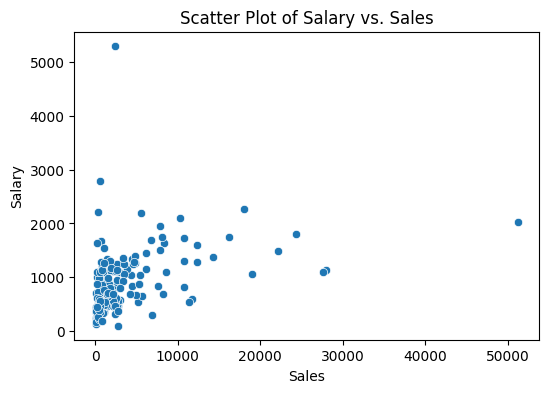

In [12]:
# scatter plot between 'Salary' and 'Sales'
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6, 4))
sns.scatterplot(data=df, x='Sales', y='Salary')
plt.title('Scatter Plot of Salary vs. Sales')

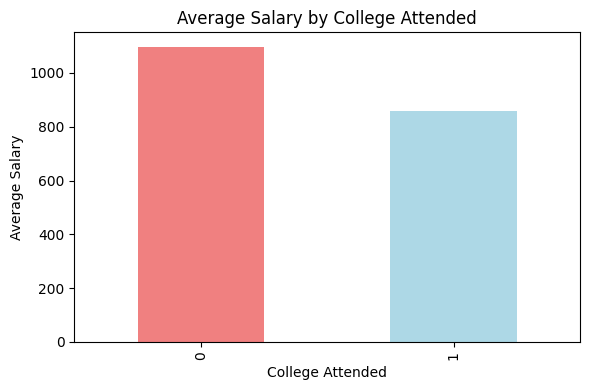

In [13]:
# bar chart for 'College' vs. 'Salary'
college_salary = df.groupby('College')['Salary'].mean()
plt.figure(figsize=(6, 4))
college_salary.plot(kind='bar', color=['lightcoral', 'lightblue'])
plt.title('Average Salary by College Attended')
plt.xlabel('College Attended')
plt.ylabel('Average Salary')

# Show the plots
plt.tight_layout()
plt.show()